## Import Libraries

In [125]:
import json
import pandas as pd
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt

### Sales Table From Json to DataFrame

In [80]:
with open("data/Sales.json", "r", encoding="utf-8") as f:
    sales_data = json.load(f)

sales_df = pd.DataFrame(sales_data)

In [81]:
# check if there is unnamed files
expected_fields = {
    "ProductKey", "Product Name","Brand","Color","Subcategory","Category","CustomerKey",
    "Customer Code","Name","Education","Occupation",
    "Continent","City","State","CountryRegion","OrderDate","Quantity","Net Price"
}

all_unmapped = set()

for index, record in enumerate(sales_data):
    record_keys = set(record.keys())
    unmapped = record_keys - expected_fields
    if unmapped:
        print(unmapped)
        all_unmapped.update(unmapped)

if not all_unmapped:
    print("there is no unnamed")
else:
    print(all_unmapped)


there is no unnamed


## Data Exploration

In [82]:
sales_df.head(2)

,ProductKey,Product Name,Brand,Color,Subcategory,Category,CustomerKey,Customer Code,Name,Education,Occupation,Continent,City,State,CountryRegion,OrderDate,Quantity,Net Price
0,2492,Cigarette Lighter Adapter for Contoso Phones E...,Contoso,Cell phones Accessories,Cell phones Accessories,Cell phones,18813,CS551,None,None,None,North America,Spokane,Washington,United States,1/1/2008,1,23.7405
1,2492,Cigarette Lighter Adapter for Contoso Phones E...,Contoso,Cell phones Accessories,Cell phones Accessories,Cell phones,18813,CS551,None,None,None,North America,Spokane,Washington,United States,1/1/2008,1,23.7405


In [83]:
sales_df.shape

(298246, 18)

In [84]:
sales_df.info()
# OrderDate not a date data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 298246 entries, 0 to 298245
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   ProductKey     298246 non-null  int64  
 1   Product Name   298246 non-null  object 
 2   Brand          298246 non-null  object 
 3   Color          298246 non-null  object 
 4   Subcategory    298246 non-null  object 
 5   Category       298246 non-null  object 
 6   CustomerKey    298246 non-null  int64  
 7   Customer Code  298246 non-null  object 
 8   Name           29797 non-null   object 
 9   Education      29797 non-null   object 
 10  Occupation     29797 non-null   object 
 11  Continent      298246 non-null  object 
 12  City           298246 non-null  object 
 13  State          298246 non-null  object 
 14  CountryRegion  298246 non-null  object 
 15  OrderDate      298246 non-null  object 
 16  Quantity       298246 non-null  int64  
 17  Net Price      298246 non-nul

In [85]:
sales_df.describe()

,ProductKey,CustomerKey,Quantity,Net Price
count,298246.000000,298246.000000,298246.000000,298246.000000
mean,1521.765459,18028.134758,1.399338,200.355684
std,795.349596,3245.803039,0.878602,331.377334
min,1.000000,13.000000,1.000000,0.760000
25%,822.000000,18857.000000,1.000000,14.400000
50%,1666.000000,18934.000000,1.000000,85.491000
75%,2321.000000,19018.000000,1.000000,255.550000
max,2517.000000,19143.000000,4.000000,3199.990000


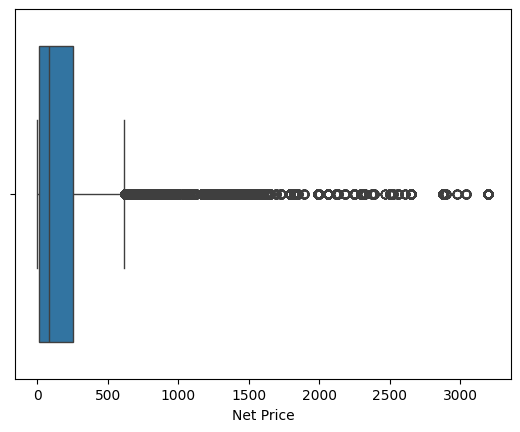

In [86]:
sns.boxplot(x=sales_df['Net Price'])
plt.show()
# will not concider as outliers as our objective is sales analysis 
# So will leave it 

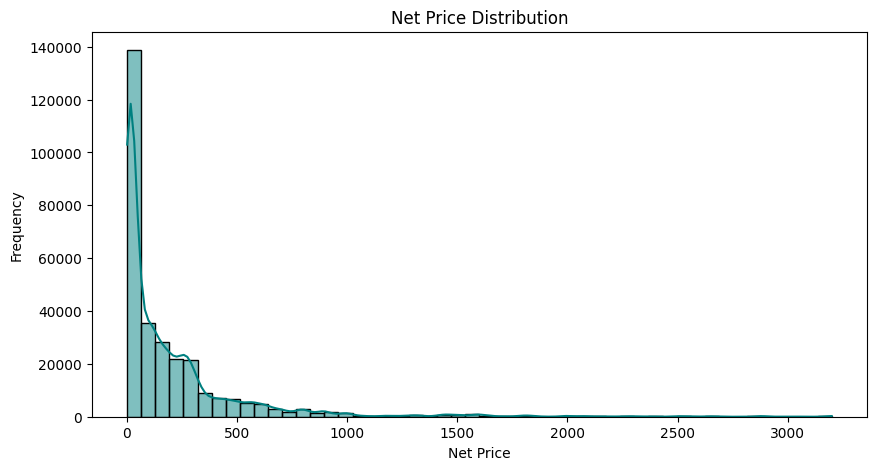

In [87]:
plt.figure(figsize=(10,5))
sns.histplot(
    sales_df['Net Price'],
    bins=50,
    kde=True,
    color='teal'
)
plt.title('Net Price Distribution')
plt.xlabel('Net Price')
plt.ylabel('Frequency')
plt.show()

# right skwed it is normal in electronics sales

In [88]:
# check trim on columns
sales_df.columns
# no needed its fine
#[col for col in sales_df.columns if col != col.strip()]

Index(['ProductKey', 'Product Name', 'Brand', 'Color', 'Subcategory',
       'Category', 'CustomerKey', 'Customer Code', 'Name', 'Education',
       'Occupation', 'Continent', 'City', 'State', 'CountryRegion',
       'OrderDate', 'Quantity', 'Net Price'],
      dtype='object')

In [89]:
# check trim in the data itself
sales_df.apply(
    lambda col: col.astype(str).str.contains(r'^\s|\s$', na=False).any()
)

ProductKey       False
Product Name     False
Brand            False
Color            False
Subcategory      False
Category         False
CustomerKey      False
Customer Code    False
Name             False
Education        False
Occupation       False
Continent        False
City             False
State            False
CountryRegion    False
OrderDate        False
Quantity         False
Net Price        False
dtype: bool

In [90]:
important_columns = [
    "ProductKey", "Product Name", "Brand",
    "Subcategory", "Category","CustomerKey", "Customer Code",
    "Continent", "CountryRegion",
    "State", "City", "OrderDate", "Quantity", "Net Price"
]

for col in important_columns:
    print(col)
    print(sales_df[col].value_counts())
    print('-' * 50)


ProductKey
ProductKey
2509    3455
2491    3383
2505    3229
2490    3136
2497    3073
        ... 
1560       6
2001       6
875        6
318        6
1827       5
Name: count, Length: 2495, dtype: int64
--------------------------------------------------
Product Name
Product Name
Contoso Original K1m Li-Ion Standard Battery E170 Black    3455
Cigarette Lighter Adapter for Contoso Phones E110 Black    3383
Contoso Touch Stylus Pen E150 Red                          3229
Contoso Rubberized Skin BlackBerry E100 White              3136
Headphone Adapter for Contoso Phone E130 White             3073
                                                           ... 
The Phone Company PDA Phone 3.7 inches M340 White             6
Fabrikam Microwave 1.5CuFt X1100 Red                          6
Contoso Wireless Notebook Optical Mouse X205 White            6
SV Car Video LCD9.2W X9280 Silver                             6
Litware Washer & Dryer 27in L420 White                        5
Name: count, L

Color & subcategory same Values (may be wrong query)

In [91]:
sales_df.duplicated().sum()
#lots of duplicated
# but recommended unique column for order or making data with timestamp data type 
# as dropping duplicated in this case not accurate but better than leaving it 

np.int64(218008)

In [92]:
(sales_df.isnull().mean() * 100).round(2)
# will check again after transformation (specially removing duplicated)

ProductKey        0.00
Product Name      0.00
Brand             0.00
Color             0.00
Subcategory       0.00
Category          0.00
CustomerKey       0.00
Customer Code     0.00
Name             90.01
Education        90.01
Occupation       90.01
Continent         0.00
City              0.00
State             0.00
CountryRegion     0.00
OrderDate         0.00
Quantity          0.00
Net Price         0.00
dtype: float64

## Check Redundent Data


In [93]:
sales_df[["Color" , "Subcategory"]].sample(5)

,Color,Subcategory
128375,Camcorders,Camcorders
172695,Cell phones Accessories,Cell phones Accessories
64978,"Printers, Scanners & Fax","Printers, Scanners & Fax"
295496,Digital SLR Cameras,Digital SLR Cameras
21402,Download Games,Download Games


In [96]:
sales_df.groupby("CustomerKey")["Customer Code"].nunique().value_counts()
# Mapping 1:1 

Customer Code
1    8868
Name: count, dtype: int64

Two redundent columns

## Data Transformation

In [97]:
# refine some column names
sales_df = sales_df.rename(columns={
    "Product Name": "ProductName",
    "Customer Code": "CustomerCode",
    "Net Price": "NetPrice"
})

#### Refine Data Types

In [98]:
sales_df['OrderDate'] = pd.to_datetime(sales_df['OrderDate'])

#### Removing Duplicated

In [99]:
sales_df.drop_duplicates(inplace=True)
# but recommended unique column for order or making data with timestamp data type 
# as dropping duplicated in this case not accurate but better than leaving it 

In [100]:
# Check again after removing duplicated
(sales_df.isnull().mean() * 100).round(2)
# same problem again 62% less few

ProductKey        0.00
ProductName       0.00
Brand             0.00
Color             0.00
Subcategory       0.00
Category          0.00
CustomerKey       0.00
CustomerCode      0.00
Name             62.86
Education        62.86
Occupation       62.86
Continent         0.00
City              0.00
State             0.00
CountryRegion     0.00
OrderDate         0.00
Quantity          0.00
NetPrice          0.00
dtype: float64

#### Handling Nulls

drop columns like occupation and education and leave one like name 

the three won't be usefull for my objective 

but one of them I will use to get right result for real customer 

as noticed that orders withoud customer information recorded as customer code that mapped with state or city 

so this code not for one customer but collect multiple customer

In [101]:
sales_df = sales_df.drop(columns=['Education'])
sales_df = sales_df.drop(columns=['Occupation'])

#### 

drop color name as data not suitable as color but redundent with Category

#### Drop Redundent Columns

In [102]:
sales_df = sales_df.drop(columns=['Color'])

In [103]:
sales_df = sales_df.drop(columns=["CustomerCode"])

why not CustomerKey? 
1. int so faster
2. less memory
3. suitable for joins
4. fixed key

CustomerCode
1. string
2. no added value till now
3. same meaning

so both together make Redundancy

### finally will extract some columns in Loading phase

# check after cleaning

In [106]:
sales_df.isnull().sum().sum()

np.int64(50441)

In [107]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 80238 entries, 0 to 298245
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   ProductKey     80238 non-null  int64         
 1   ProductName    80238 non-null  object        
 2   Brand          80238 non-null  object        
 3   Subcategory    80238 non-null  object        
 4   Category       80238 non-null  object        
 5   CustomerKey    80238 non-null  int64         
 6   Name           29797 non-null  object        
 7   Continent      80238 non-null  object        
 8   City           80238 non-null  object        
 9   State          80238 non-null  object        
 10  CountryRegion  80238 non-null  object        
 11  OrderDate      80238 non-null  datetime64[ns]
 12  Quantity       80238 non-null  int64         
 13  NetPrice       80238 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(3), object(9)
memory usage: 9.2+ M

In [108]:
sales_df.duplicated().sum()

np.int64(0)

# Load Data For Power BI AS CSV

In [109]:
dim_product = sales_df[[
    "ProductKey", "ProductName", "Brand",
    "Subcategory", "Category"
]].drop_duplicates()

dim_product.to_csv("dim_product.csv", index=False)


In [111]:
dim_customer = sales_df[[
    "CustomerKey" , 'Name'

# fill with 
# DROP columns because not effective for my objectuve and if exist not effecient for performace
]].drop_duplicates()

dim_customer.to_csv("dim_customer.csv", index=False)


In [112]:
dim_geography = sales_df[[
    "City", "State", "CountryRegion", "Continent"
]].drop_duplicates().reset_index(drop=True)

dim_geography["GeographyKey"] = dim_geography.index + 1

dim_geography.to_csv("dim_geography.csv", index=False)


In [113]:
dim_date = sales_df[["OrderDate"]].drop_duplicates()

dim_date["DateKey"] = dim_date["OrderDate"].dt.strftime("%Y%m%d").astype(int)
dim_date["Year"] = dim_date["OrderDate"].dt.year
dim_date["Month"] = dim_date["OrderDate"].dt.month
dim_date["MonthName"] = dim_date["OrderDate"].dt.month_name()
dim_date["Quarter"] = dim_date["OrderDate"].dt.quarter

dim_date.to_csv("dim_date.csv", index=False)


In [114]:
sales_df = sales_df.merge(
    dim_geography,
    on=["City", "State", "CountryRegion", "Continent"],
    how="left"
)

sales_df = sales_df.merge(
    dim_date[["OrderDate", "DateKey"]],
    on="OrderDate",
    how="left"
)


In [123]:
fact_sales = sales_df[[
    "ProductKey",
    "CustomerKey",
    "GeographyKey",
    "DateKey",
    "Quantity",
    "NetPrice"
]]

fact_sales["SalesAmount"] = (
    fact_sales["Quantity"] * fact_sales["NetPrice"]
)

fact_sales.to_csv("fact_sales.csv", index=False)


C:\Users\win 10 pro\AppData\Local\Temp\ipykernel_16548\791139510.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fact_sales["SalesAmount"] = (


#### Data Validation

In [109]:
print("Fact rows:", fact_sales.shape[0])
print("Products:", dim_product.shape[0])
print("Customers:", dim_customer.shape[0])
print("Geography:", dim_geography.shape[0])
print("Dates:", dim_date.shape[0])


Fact rows: 80238
Products: 2495
Customers: 8868
Geography: 306
Dates: 603


calculation for checking the data modelling working or not

In [118]:
actual_by_brand_year = (
    sales_df
    .assign(Year=lambda df: df["OrderDate"].dt.year)
    .query("Year == 2009")
    .assign(SalesAmount=lambda df: df["NetPrice"] * df["Quantity"])
    .groupby(["CountryRegion", "Year", "Brand"], as_index=False)["SalesAmount"]
    .sum()
    .rename(columns={"SalesAmount": "ActualSales"})
)


In [120]:
actual_by_brand_year.head()

,CountryRegion,Year,Brand,ActualSales
0,China,2009,A. Datum,91757.5150
1,China,2009,Adventure Works,217082.0175
2,China,2009,Contoso,448502.6765
3,China,2009,Fabrikam,412322.0120
4,China,2009,Litware,242230.9930


In [121]:
total_sales = fact_sales[fact_sales["DateKey"].astype(str).str.startswith("2009")]["SalesAmount"].sum()
total_sales

np.float64(19546327.2928)

# 

# 

# 